## Linguas I - Limpeza de dados

#### Bibliotecas e Base de Dados

In [320]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline
import matplotlib.pyplot as plt


In [321]:
## print("Esperamos trabalhar no diretório")
print(os.getcwd())


/Users/liviacarvalho/Documents/Insper Junior/Capacitação/Case I - Linguas I/LinguasI-Analise-Exploratoria


In [322]:
filename = 'base_cliente.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')
    

Parece que o arquivo base_cliente.xlsx está na mesma pasta do notebook da avaliação, yay!



In [323]:
# Carregando os dados
df = pd.read_excel(filename)
df.head()

,"ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa"
0,"0,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,58138.0,Ingles..."
1,"1,Trabalho,GraduaÃ§Ã£o,TaubatÃ©,46344.0,Espanh..."
2,"2,Estudos,graduacao,SÃ£o Bernardo,71613.0,Ingl..."
3,"3,Viagem,graduacao,SÃ£o Paulo,,Espanhol,4,22,2..."
4,"4,Trabalho,Doutorado,SÃ£o Paulo,58293.0,Ingres..."


In [324]:

# Lendo com engine openpyxl
df_raw = pd.read_excel(filename, engine="openpyxl", header=None)

# Separando os dados da única coluna em múltiplas colunas
df = df_raw[0].str.split(",", expand=True)

# Ajustando o nome das colunas (a primeira linha do df agora contém os nomes)
df.columns = df.iloc[0]
df = df[1:]

df.head(100)


,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa
1,0,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,58138.0,Ingles,4,19,1983,3.0,4.0
2,1,Trabalho,GraduaÃ§Ã£o,TaubatÃ©,46344.0,Espanhol,4,10,1980,4.0,3.0
3,2,Estudos,graduacao,SÃ£o Bernardo,71613.0,Ingles,3,59,1991,4.0,5.0
4,3,Viagem,graduacao,SÃ£o Paulo,,Espanhol,4,22,2010,1,1.0
5,4,Trabalho,Doutorado,SÃ£o Paulo,58293.0,Ingres,3,8,2007,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
96,95,Viagem,graduacao,SÃ£o Paulo,,Espanhol,3,19,2009,1,2.0
97,96,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,47916.0,Espanhol,3,12,1986,3.0,3.0
98,97,Viagem,GraduaÃ§Ã£o,SÃ£o Paulo,51813.0,Ingles,1,15,1998,3.0,4.0
99,98,Estudos,Ensino MÃ©dio,SÃ£o Paulo,78497.0,Espanhol,1,4,1977,4.0,6.0


In [325]:
#Correção: 'Education'
df["Education"] = df["Education"].replace({
    "GraduaÃ§Ã£o": "Graduação",
    "Doutorado": "Doutorado",
    "Ensino MÃ©dio": "Ensino Médio",
    "graduacao": "Graduação" 
})

#Correção: 'Cidade'
df["Cidade"] = df["Cidade"].replace({
    "SÃ£o Paulo": "São Paulo",
    "SÃ£o Bernardo": "São Bernardo",
    "TaubatÃ©": "Taubaté"
})

#Correção: 'Aulas'
df["Aulas"] = df["Aulas"].replace({
    "Ingres": "Ingles",
})


df['Quartos_na_casa'] = df['Quartos_na_casa'].astype(float)
df['Quartos_na_casa'] = df['Quartos_na_casa'].astype('Int64')
df['Banheiros_na_casa'] = df['Banheiros_na_casa'].astype(float)
df['Banheiros_na_casa'] = df['Banheiros_na_casa'].astype('Int64')


df.head(20)


,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa
1,0,Viagem,Graduação,São Paulo,58138.0,Ingles,4,19,1983,3,4
2,1,Trabalho,Graduação,Taubaté,46344.0,Espanhol,4,10,1980,4,3
3,2,Estudos,Graduação,São Bernardo,71613.0,Ingles,3,59,1991,4,5
4,3,Viagem,Graduação,São Paulo,,Espanhol,4,22,2010,1,1
5,4,Trabalho,Doutorado,São Paulo,58293.0,Ingles,3,8,2007,3,4
6,5,Trabalho,Mestrado,São Paulo,,Espanhol,3,9,1993,4,4
7,6,Viagem,Graduação,São Paulo,55635.0,Espanhol,4,12,1997,2,4
8,7,Estudos,Doutorado,Campinas,33454.0,Ingles,3,45,2011,2,2
9,8,Trabalho,Doutorado,São Paulo,30351.0,Ingles,4,45,2000,1,2
10,9,Trabalho,Doutorado,São Bernardo,5648.0,Ingles,5,12,1976,1,1


#### Visão Macro

In [326]:
# Visão macro
resumo_estatistico = df.describe(include='all')
print("Resumo Estatístico:")
print(resumo_estatistico)

# Tipos de dados por coluna
print("\nTipos de Dados:")
print(df.dtypes)

Resumo Estatístico:
0      ID_Cliente    Motivo  Education     Cidade Renda_anual   Aulas   NPS  \
count        2240      2240       2240       2240        2240    2240  2240   
unique       2240         4          5          5        1709       4     5   
top             0  Trabalho  Graduação  São Paulo              Ingles     3   
freq            1       896       1127       1567         339    1008   652   
mean          NaN       NaN        NaN        NaN         NaN     NaN   NaN   
std           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
min           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
25%           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
50%           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
75%           NaN       NaN        NaN        NaN         NaN     NaN   NaN   
max           NaN       NaN        NaN        NaN         NaN     NaN   NaN   

0      Num_Aulas Ano_de_nascime

In [327]:
# Contagem de valores únicos por coluna - OUTLIERS!!!!!!
print("\nQuantidade de Valores Únicos por Coluna:")
print(df.nunique().sort_values(ascending=False))

print("\nFormato do DataFrame:")
print(f"{df.shape[0]} linhas × {df.shape[1]} colunasg")


Quantidade de Valores Únicos por Coluna:
0
ID_Cliente           2240
Renda_anual          1709
Num_Aulas              82
Ano_de_nascimento      59
Quartos_na_casa         6
Education               5
Cidade                  5
NPS                     5
Banheiros_na_casa       5
Motivo                  4
Aulas                   4
dtype: int64

Formato do DataFrame:
2240 linhas × 11 colunasg


In [328]:
for coluna in df.columns:
    if coluna != "ID_Cliente":
        print(f"\nDistribuição de valores únicos na coluna: {coluna}")
        print(df[coluna].value_counts(dropna=False))



Distribuição de valores únicos na coluna: Motivo
Motivo
Trabalho    896
Estudos     784
Viagem      448
            112
Name: count, dtype: int64

Distribuição de valores únicos na coluna: Education
Education
Graduação             1127
Doutorado              486
Mestrado               370
Ensino Médio           203
Ensino Fundamental      54
Name: count, dtype: int64

Distribuição de valores únicos na coluna: Cidade
Cidade
São Paulo       1567
São Bernardo     326
Campinas         231
Taubaté           68
Rio Branco        48
Name: count, dtype: int64

Distribuição de valores únicos na coluna: Renda_anual
Renda_anual
                     339
52247.25135379061     20
7500.0                10
83844.0                3
63841.0                3
                    ... 
78285.0                1
35523.0                1
38829.0                1
58512.0                1
69245.0                1
Name: count, Length: 1709, dtype: int64

Distribuição de valores únicos na coluna: Aulas
Aulas
Ingl

### Valores Faltantes

In [329]:
#strings vazias ou espaços por NaN
df.replace(["", " ", "  ", "   "], np.nan, inplace=True)

faltantes = df.isnull().sum()
faltantes_percentual = (faltantes / len(df)) * 100

# Filtrando apenas os que têm dados ausentes
faltantes = faltantes[faltantes > 0]
faltantes_percentual = faltantes_percentual[faltantes_percentual > 0]

print("VALORES FALTANTES:")
print(faltantes)

print("\nPERCENTUAL POR COLUNA:")
print(faltantes_percentual)


VALORES FALTANTES:
0
Motivo         112
Renda_anual    339
dtype: int64

PERCENTUAL POR COLUNA:
0
Motivo          5.000000
Renda_anual    15.133929
dtype: float64


#### Variável Motivos 

In [330]:
#Em relacão as variáveis motivo e renda:
# Criando variáveis booleanas para indicar ausência
df["motivo_na"] = df["Motivo"].isnull()
df["renda_na"] = df["Renda_anual"].isnull()

# Tabela cruzada das ausências
tabela_cruzada = pd.crosstab(df["motivo_na"], df["renda_na"])

print("Tabela cruzada de valores ausentes (Motivo x Renda_anual):")
print(tabela_cruzada)

print("\nProporção de ausência de renda dentro dos que têm e não têm motivo:")
print(tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0))


Tabela cruzada de valores ausentes (Motivo x Renda_anual):
renda_na   False  True 
motivo_na              
False       1800    328
True         101     11

Proporção de ausência de renda dentro dos que têm e não têm motivo:
renda_na      False     True 
motivo_na                    
False      0.845865  0.154135
True       0.901786  0.098214


In [331]:
# Filtrar somente linhas com motivo ausente
nulos_por_aula = df[df["Motivo"].isnull()]["Aulas"].value_counts()

print("Contagem de valores nulos em 'Motivo' por tipo de 'Aulas':")
print(nulos_por_aula)

Contagem de valores nulos em 'Motivo' por tipo de 'Aulas':
Aulas
Espanhol             58
Ingles               37
Espanhol e Ingles    10
Mandarim              7
Name: count, dtype: int64


In [332]:
#MOTIVO: COMPLETAMENTE AO ACASO (MCAR)
#    -duvida: usar moda ou colocar proporcinalmente?

# # Com a moda
# df["Motivo"].fillna(df["Motivo"].mode()[0], inplace=True)


# # Com proporção
# proporcoes = df["Motivo"].value_counts(normalize=True)
# num_nulos = df["Motivo"].isnull().sum()
# preenchimento = np.random.choice(proporcoes.index, size=num_nulos, p=proporcoes.values)
# df.loc[df["Motivo"].isnull(), "Motivo"] = preenchimento


# print("Distribuição da variável 'Motivo' após o preenchimento:")
# print(df["Motivo"].value_counts())

# Criar uma cópia para segurança (opcional)
df_copy = df.copy()

# Iterar sobre cada tipo de aula
for aula in df_copy["Aulas"].unique():
    # Filtrar apenas o grupo com essa aula
    grupo = df_copy[df_copy["Aulas"] == aula]
    
    # Distribuição original de 'Motivo' (excluindo nulos)
    distribuicao = grupo["Motivo"].value_counts(normalize=True)
    
    # Quantos valores nulos existem neste grupo
    n_nulos = grupo["Motivo"].isnull().sum()
    
    # Gerar os preenchimentos com base na distribuição
    preenchimento = np.random.choice(distribuicao.index, size=n_nulos, p=distribuicao.values)
    
    # Aplicar o preenchimento nos índices corretos
    indices_nulos = grupo[grupo["Motivo"].isnull()].index
    df_copy.loc[indices_nulos, "Motivo"] = preenchimento

df["Motivo"] = df_copy["Motivo"]

print(df["Motivo"].isnull().sum())  
print(df["Motivo"].value_counts())  # Nova distribuição geral




0
Motivo
Trabalho    946
Estudos     821
Viagem      473
Name: count, dtype: int64


Valores ausentes da variável Motivo: análise que identificou variação na proporção de nulos entre os tipos de Aulas, indicando que os dados estavam condicionadamente ao acaso (MAR). Por isso, foi aplicado uma imputação proporcional dentro de cada grupo de Aulas, preservando a distribuição original da variável em cada categoria. Essa abordagem garante maior fidelidade estatística, evita viés nas análises futuras e segue boas práticas para tratamento de dados MAR.
A imputação proporcional preserva as características reais da base, respeita a lógica estatística dos dados condicionalmente ausentes (MAR) e evita distorções nas análises futuras. Além de que o cliente mencionou que muitas vezes ele apenas "Esquecia" de anotar certas coisas.

#### Variável Renda

In [333]:
#Em relação a variável renda: relação com numero de banheiros e de quartos

df["renda_na"] = df["Renda_anual"].isnull()

# Tabela cruzada para Banheiros
print("Ausência de Renda por número de Banheiros:")
print(
    df.groupby("Banheiros_na_casa")["renda_na"]
      .mean()
      .sort_index()
      .round(4)
)

# Tabela cruzada para Quartos
print("\nProporção de ausência de Renda por número de Quartos:")
print(
    df.groupby("Quartos_na_casa")["renda_na"]
      .mean()
      .sort_index()
      .round(4)
)


Ausência de Renda por número de Banheiros:
Banheiros_na_casa
1    0.1570
2    0.1494
3    0.1354
4    0.1526
5    0.1636
Name: renda_na, dtype: float64

Proporção de ausência de Renda por número de Quartos:
Quartos_na_casa
1    0.1523
2    0.1518
3    0.1518
4    0.1409
5    0.1653
6    0.1459
Name: renda_na, dtype: float64


In [334]:

# garantir que Renda_anual seja numérica
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")

# Criação da coluna de ausência de renda
df["renda_na"] = df["Renda_anual"].isnull()

#  variável combinada de quartos e banheiros
df["Quartos_Banheiros"] = (
    df["Quartos_na_casa"].astype(str) + "Q_" + df["Banheiros_na_casa"].astype(str) + "B"
)

# Renda média por combinação 
media_renda = (
    df.groupby("Quartos_Banheiros")["Renda_anual"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)
print("Renda média por Quartos_Banheiros:")
print(media_renda)

Renda média por Quartos_Banheiros:
Quartos_Banheiros
6Q_4B    83806.31
6Q_5B    83168.08
5Q_5B    71272.80
5Q_4B    67622.68
5Q_3B    67028.11
4Q_5B    60937.09
4Q_4B    59962.24
4Q_3B    55642.14
4Q_2B    54954.58
1Q_3B    52247.25
3Q_4B    48016.71
3Q_3B    47511.65
3Q_2B    43167.01
3Q_1B    42093.87
2Q_2B    35992.54
2Q_3B    35665.71
2Q_1B    32746.94
1Q_2B    21828.50
1Q_1B    21380.72
Name: Renda_anual, dtype: float64


In [335]:
# Proporção de ausência de renda por combinação
ausencia_renda = (
    df.groupby("Quartos_Banheiros")["renda_na"]
    .mean()
    .sort_values(ascending=False)
    .round(4)
)
print("\nProporção de ausência de renda por Quartos_Banheiros:")
print(ausencia_renda)



Proporção de ausência de renda por Quartos_Banheiros:
Quartos_Banheiros
5Q_5B    0.2000
2Q_1B    0.1900
3Q_2B    0.1719
1Q_3B    0.1667
5Q_4B    0.1667
1Q_1B    0.1541
4Q_5B    0.1538
6Q_5B    0.1529
3Q_3B    0.1505
3Q_4B    0.1500
4Q_4B    0.1471
2Q_2B    0.1423
4Q_2B    0.1364
4Q_3B    0.1364
1Q_2B    0.1282
6Q_4B    0.0930
2Q_3B    0.0870
5Q_3B    0.0345
3Q_1B    0.0000
Name: renda_na, dtype: float64


Renda média cresce com mais quartos e banheiros - confirma uma associação positiva entre estrutura da moradia e renda; Ausência de renda também varia por perfil domiciliar -> combinações com alta renda média apresentam baixa ausência de renda, mas já outras, como 5Q_5B, têm alta renda média mas também alta ausência de renda.

Isso pode sugerir que mesmo perfis de alto padrão podem estar mais sujeitos a inconsistências cadastrais, ou que a variável renda não foi preenchida mesmo em perfis ricos.

In [336]:
# Converter para número (forçando erros a NaN, se houver)
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")

# Agora sim, criamos as faixas de idade
df["faixa_idade"] = pd.cut(df["Ano_de_nascimento"],
                           bins=[1900, 1979, 1989, 1999, 2009, 2025],
                           labels=["<1980", "1980s", "1990s", "2000s", "2010s"])

# E mostramos a proporção de ausência de renda por faixa etária
print("\n Ausência de Renda por Faixa de Ano de Nascimento:")
print(df.groupby("faixa_idade")["renda_na"].mean().round(4))

# Proporção de ausência de renda por Cidade
print("\nAusência de Renda por Cidade:")
print(df.groupby("Cidade")["renda_na"].mean().round(4))

# Proporção de ausência de renda por Educação
print("\nAusência de Renda por Educação:")
print(df.groupby("Education")["renda_na"].mean().round(4))



 Ausência de Renda por Faixa de Ano de Nascimento:
faixa_idade
<1980    0.1487
1980s    0.1726
1990s    0.1433
2000s    0.1497
2010s    0.1390
Name: renda_na, dtype: float64

Ausência de Renda por Cidade:
Cidade
Campinas        0.1558
Rio Branco      0.1458
São Bernardo    0.1534
São Paulo       0.1506
Taubaté         0.1471
Name: renda_na, dtype: float64

Ausência de Renda por Educação:
Education
Doutorado             0.1296
Ensino Fundamental    0.1481
Ensino Médio          0.1527
Graduação             0.1535
Mestrado              0.1730
Name: renda_na, dtype: float64


In [337]:

df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")

df["renda_na"] = df["Renda_anual"].isnull()

# faixas de idade
df["faixa_idade"] = pd.cut(df["Ano_de_nascimento"],
                           bins=[1900, 1979, 1989, 1999, 2009, 2025],
                           labels=["<1980", "1980s", "1990s", "2000s", "2010s"])

# apenas registros com Renda válida
df_validos = df[df["Renda_anual"].notnull()]

# Renda média por grupo
print("Renda média por Faixa Etária:")
print(df_validos.groupby("faixa_idade")["Renda_anual"].mean().round(2))

print("\nRenda média por Cidade:")
print(df_validos.groupby("Cidade")["Renda_anual"].mean().round(2))

print("\nRenda média por Escolaridade:")
print(df_validos.groupby("Education")["Renda_anual"].mean().round(2))



Renda média por Faixa Etária:
faixa_idade
<1980    58792.61
1980s    56794.50
1990s    50909.13
2000s    49115.26
2010s    45088.45
Name: Renda_anual, dtype: float64

Renda média por Cidade:
Cidade
Campinas        53431.19
Rio Branco      50425.10
São Bernardo    51567.76
São Paulo       51945.21
Taubaté         49022.40
Name: Renda_anual, dtype: float64

Renda média por Escolaridade:
Education
Doutorado             56409.83
Ensino Fundamental    20575.78
Ensino Médio          46979.24
Graduação             52237.14
Mestrado              52219.22
Name: Renda_anual, dtype: float64


In [338]:
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
df_renda = df[df["Renda_anual"].notnull()].copy()

df_corr = df_renda[["Renda_anual", "Ano_de_nascimento", "Quartos_na_casa", "Banheiros_na_casa"]].copy()
df_corr = df_corr.join(pd.get_dummies(df_renda["Education"], prefix="Edu"))
df_corr = df_corr.join(pd.get_dummies(df_renda["Cidade"], prefix="Cid"))

#correlação com Renda_anual
correlacoes = df_corr.corr(numeric_only=True)["Renda_anual"].drop("Renda_anual").sort_values(ascending=False)

print("Correlação das variáveis com Renda Anual (dados não nulos):")
print(correlacoes.round(4))


Correlação das variáveis com Renda Anual (dados não nulos):
Quartos_na_casa           0.9498
Banheiros_na_casa         0.9124
Edu_Doutorado             0.1129
Cid_Campinas              0.0240
Edu_Graduação             0.0149
Edu_Mestrado              0.0061
Cid_São Paulo             0.0017
Cid_São Bernardo         -0.0068
Cid_Rio Branco           -0.0104
Cid_Taubaté              -0.0242
Edu_Ensino Médio         -0.0732
Ano_de_nascimento        -0.1966
Edu_Ensino Fundamental   -0.2320
Name: Renda_anual, dtype: float64


Ausência de dados: Verificacao ausência de Renda_anual por idade, cidade, educação, quartos e banheiros;
Identificacao de que a ausência de renda é razoavelmente homogênea, com leve concentração entre os mestrandos e faixa de 1980s.
Correlação das variáveis com Renda_anual (dummies): Apesar das correlações serem fracas, foi quantificado a força de associação entre atributos categóricos e renda

Árvore de Decisão Regressora: técnica permite estimar a renda com base em padrões observados entre múltiplas variáveis explicativas, como idade, número de quartos e banheiros, escolaridade, cidade, motivo das aulas, entre outras. O modelo utilizado — uma árvore de decisão — é capaz de capturar relações não lineares e interações complexas entre as variáveis, ajustando-se aos dados disponíveis com maior flexibilidade. Ao treinar o modelo apenas com registros que possuem a renda conhecida, ele aprende os perfis que influenciam esse valor e, posteriormente, aplica esse conhecimento para estimar os casos em que a renda está ausente. 

robusta para estimar valores numéricos faltantes com base em múltiplas variáveis explicativas, sem exigir suposições lineares ou distribuição normal dos dados

In [339]:
# Garantir os tipos corretos
df["Renda_anual"] = pd.to_numeric(df["Renda_anual"], errors="coerce")
df["Ano_de_nascimento"] = pd.to_numeric(df["Ano_de_nascimento"], errors="coerce")
df["Banheiros_na_casa"] = pd.to_numeric(df["Banheiros_na_casa"], errors="coerce")
df["Quartos_na_casa"] = pd.to_numeric(df["Quartos_na_casa"], errors="coerce")

# Selecionar apenas registros com renda conhecida
df_full = df[df["Renda_anual"].notnull()].copy()

# Definir variáveis explicativas
features = [
    "Ano_de_nascimento",
    "Banheiros_na_casa",
    "Quartos_na_casa",
    "Education",
    "Cidade",
    "Motivo",
    "Num_Aulas",
    "NPS",
    "Aulas"
]

# Separar X e y
X = df_full[features]
y = df_full["Renda_anual"]

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento com dummies automáticos
categorical_cols = ["Education", "Cidade", "Motivo", "Aulas"]
numerical_cols = ["Ano_de_nascimento", "Banheiros_na_casa", "Quartos_na_casa", "Num_Aulas", "NPS"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", SimpleImputer(strategy="median"), numerical_cols)
])

# Pipeline com árvore de decisão regressora
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", DecisionTreeRegressor(max_depth=6, random_state=42))
])

# Treinar com o conjunto de treino
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar desempenho
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Avaliação do Modelo (dados de teste):")
print(f"Erro absoluto médio (MAE): {mae:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.4f}")



Avaliação do Modelo (dados de teste):
Erro absoluto médio (MAE): 3250.62
Coeficiente de determinação (R²): 0.8913


In [343]:
# Previsao dos valores ausentes com base no modelo treinado
df_null = df[df["Renda_anual"].isnull()].copy()
X_null = df_null[features]
predicted_values = model.predict(X_null)

df.loc[df["Renda_anual"].isnull(), "Renda_anual"] = predicted_values

print(f"Total imputado: {len(predicted_values)}")
print(f"Valores ausentes restantes: {df['Renda_anual'].isnull().sum()}")


df.head(20)



Total imputado: 339
Valores ausentes restantes: 0


,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa,motivo_na,renda_na,Quartos_Banheiros,faixa_idade,Renda_anual_imputada
1,0,Viagem,Graduação,São Paulo,58138.000000,Ingles,4,19,1983,3,4,False,False,4Q_3B,1980s,58138.000000
2,1,Trabalho,Graduação,Taubaté,46344.000000,Espanhol,4,10,1980,4,3,False,False,3Q_4B,1980s,46344.000000
3,2,Estudos,Graduação,São Bernardo,71613.000000,Ingles,3,59,1991,4,5,False,False,5Q_4B,1990s,71613.000000
4,3,Viagem,Graduação,São Paulo,22253.544503,Espanhol,4,22,2010,1,1,False,True,1Q_1B,2010s,22253.544503
5,4,Trabalho,Doutorado,São Paulo,58293.000000,Ingles,3,8,2007,3,4,False,False,4Q_3B,2000s,58293.000000
6,5,Trabalho,Mestrado,São Paulo,60765.025000,Espanhol,3,9,1993,4,4,False,True,4Q_4B,1990s,60765.025000
7,6,Viagem,Graduação,São Paulo,55635.000000,Espanhol,4,12,1997,2,4,False,False,4Q_2B,1990s,55635.000000
8,7,Estudos,Doutorado,Campinas,33454.000000,Ingles,3,45,2011,2,2,False,False,2Q_2B,2010s,33454.000000
9,8,Trabalho,Doutorado,São Paulo,30351.000000,Ingles,4,45,2000,1,2,False,False,2Q_1B,2000s,30351.000000
10,9,Trabalho,Doutorado,São Bernardo,5648.000000,Ingles,5,12,1976,1,1,False,False,1Q_1B,<1980,5648.000000


### Outliers

Total de registros com ao menos 1 outlier: 8

Exemplo de registros com múltiplos outliers:
0    ID_Cliente    Motivo  Education     Cidade  Renda_anual     Aulas NPS  \
165         164   Estudos  Doutorado  São Paulo     157243.0  Mandarim   5   
618         617   Estudos  Doutorado  São Paulo     162397.0    Ingles   5   
656         655   Estudos  Graduação  São Paulo     153924.0    Ingles   3   
688         687  Trabalho  Doutorado  São Paulo     160803.0    Ingles   2   
2133       2132  Trabalho  Doutorado  São Paulo     156924.0    Ingles   2   

0    Num_Aulas  Ano_de_nascimento  Banheiros_na_casa  Quartos_na_casa  \
165         91               1999                  4                6   
618         51               2002                  5                6   
656          9               2001                  5                6   
688         22               2008                  5                6   
2133        26               1975                  5                6   

0

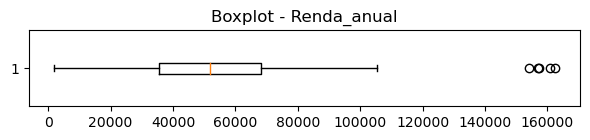

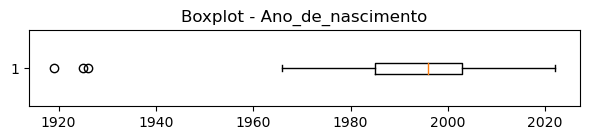

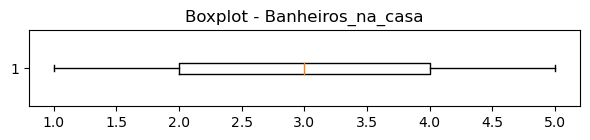

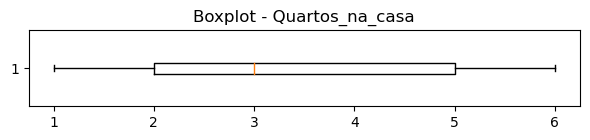

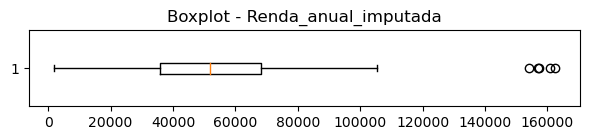

In [341]:

#coluna numérica de renda imputada
df["Renda_anual_imputada"] = pd.to_numeric(df["Renda_anual_imputada"], errors="coerce")

#variáveis numéricas
variaveis_numericas = df.select_dtypes(include=["float64", "int64", "Int64"]).columns

#DataFrame para registrar outliers
outlier_flags = pd.DataFrame(index=df.index)

#outliers por IQR para cada variável e quantas variáveis cada linha foi marcada como outlier
for coluna in variaveis_numericas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outlier_flags[coluna + "_outlier"] = (
        (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)
    )
outlier_flags["total_outlier_flags"] = outlier_flags.sum(axis=1)

#base com registros que são outliers em pelo menos uma variável
df_outliers = df[outlier_flags["total_outlier_flags"] > 0].copy()
df_outliers["qtd_outliers"] = outlier_flags["total_outlier_flags"]

print(f"Total de registros com ao menos 1 outlier: {len(df_outliers)}")
print("\nExemplo de registros com múltiplos outliers:")
print(df_outliers.sort_values("qtd_outliers", ascending=False).head())

#outliers por variável com boxplot
for coluna in variaveis_numericas:
    plt.figure(figsize=(6, 1.5))
    plt.boxplot(df[coluna].dropna(), vert=False)
    plt.title(f"Boxplot - {coluna}")
    plt.tight_layout()
    plt.show()


### DataFrame Final

In [344]:

df.to_csv("base_tratada_lingualab.csv", index=False)